<a href="https://colab.research.google.com/github/Android998/TensorFlow2.3/blob/master/TFG4.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Paso 1: Importar las librerias**

In [1]:
import os
import zipfile
import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('2')
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

## **Paso 2:Pre procesado de datos**

In [2]:
drive.mount("/content/drive")
base_dir = "./drive/My Drive/object_photos2.0"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
IMAGE_SIZE = 224
BATCH_SIZE = 64
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)


In [4]:
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

print(len(train_generator))

Found 12801 images belonging to 40 classes.
201


In [5]:
val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')
print(len(val_generator))

Found 3200 images belonging to 40 classes.
50


### **Generamos el archivo labels con las etiquetas de los objetos**

In [6]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'backpack': 0, 'bed': 1, 'belt': 2, 'blind stick': 3, 'bottle': 4, 'carpet': 5, 'cellular phone': 6, 'chair': 7, 'cup-glass': 8, 'door': 9, 'eyeglasses': 10, 'fan': 11, 'handkerchief': 12, 'headphones': 13, 'keys': 14, 'laptop': 15, 'mouse': 16, 'newspaper': 17, 'notebook': 18, 'pen': 19, 'pencil': 20, 'pillow': 21, 'plate': 22, 'plug': 23, 'printer': 24, 'radiator': 25, 'remote control': 26, 'shoes': 27, 'shorts': 28, 'socks': 29, 't-shirts': 30, 'table': 31, 'television': 32, 'toothbrush': 33, 'towel': 34, 'trash bin': 35, 'wallet': 36, 'wardrobe': 37, 'watch': 38, 'window (shade)': 39}


In [7]:
!cat labels.txt

backpack
bed
belt
blind stick
bottle
carpet
cellular phone
chair
cup-glass
door
eyeglasses
fan
handkerchief
headphones
keys
laptop
mouse
newspaper
notebook
pen
pencil
pillow
plate
plug
printer
radiator
remote control
shoes
shorts
socks
t-shirts
table
television
toothbrush
towel
trash bin
wallet
wardrobe
watch
window (shade)

## **Paso 3: Crear el modelo base ya entrenado**

In [8]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

In [9]:
modelo = tf.keras.models.Sequential()
modelo.add(tf.keras.layers.InputLayer(input_shape=IMG_SHAPE))
modelo.add(tf.keras.layers.Conv2D(128, 3, activation='relu', padding="same"))
modelo.add(tf.keras.layers.Dropout(0.2))
modelo.add(tf.keras.layers.BatchNormalization())
modelo.add(tf.keras.layers.Conv2D(64, 3, activation='relu', padding="same"))
modelo.add(tf.keras.layers.Conv2D(64, 3, activation='relu', padding="same"))
modelo.add(tf.keras.layers.BatchNormalization())
modelo.add(tf.keras.layers.BatchNormalization())
modelo.add(tf.keras.layers.Conv2D(32, 3, activation='relu', padding="same"))
modelo.add(tf.keras.layers.MaxPooling2D(pool_size=(4, 4)))
modelo.add(tf.keras.layers.Dropout(0.2))
modelo.add(tf.keras.layers.BatchNormalization())
modelo.add(tf.keras.layers.Conv2D(32, 3, activation='relu', padding="same"))
modelo.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))
modelo.add(tf.keras.layers.Dropout(0.2))
modelo.add(tf.keras.layers.BatchNormalization())
modelo.add(tf.keras.layers.Conv2D(16, 3, activation='relu', padding="same"))
modelo.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))
modelo.add(tf.keras.layers.Dropout(0.2))
modelo.add(tf.keras.layers.BatchNormalization())
modelo.add(tf.keras.layers.Flatten())
modelo.add(tf.keras.layers.Dropout(0.2))
modelo.add(tf.keras.layers.Dense(units=128, activation="relu"))
modelo.add(tf.keras.layers.Dropout(0.2))
modelo.add(tf.keras.layers.BatchNormalization())
modelo.add(tf.keras.layers.Dense(units=256, activation="relu"))
modelo.add(tf.keras.layers.Dense(units=40, activation="softmax"))

In [10]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 128)     3584      
_________________________________________________________________
dropout (Dropout)            (None, 224, 224, 128)     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 128)     512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      73792     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
batch_normalization_2 (Batch (None, 224, 224, 64)      2

In [11]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(), 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

In [12]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=10, mode="auto",
    restore_best_weights = True
)

In [19]:
history = modelo.fit(train_generator, 
           steps_per_epoch=len(train_generator), 
           epochs=100,
           validation_data=val_generator, 
           validation_steps=len(val_generator))

201/201 [==============================] - 111s 552ms/step - loss: 1.3648 - accuracy: 0.5770 - val_loss: 2.9836 - val_accuracy: 0.2978
Epoch 70/100
201/201 [==============================] - 112s 559ms/step - loss: 1.3549 - accuracy: 0.5778 - val_loss: 2.8642 - val_accuracy: 0.2800
Epoch 71/100
201/201 [==============================] - 114s 565ms/step - loss: 1.3461 - accuracy: 0.5776 - val_loss: 2.7595 - val_accuracy: 0.3106
Epoch 72/100
201/201 [==============================] - 114s 565ms/step - loss: 1.3504 - accuracy: 0.5808 - val_loss: 2.8860 - val_accuracy: 0.2875
Epoch 73/100
201/201 [==============================] - 114s 568ms/step - loss: 1.3493 - accuracy: 0.5748 - val_loss: 2.9426 - val_accuracy: 0.2791
Epoch 74/100
201/201 [==============================] - 115s 571ms/step - loss: 1.3198 - accuracy: 0.5903 - val_loss: 2.9005 - val_accuracy: 0.3137
Epoch 75/100
201/201 [==============================] - 115s 573ms/step - loss: 1.3251 - accuracy: 0.5860 - val_loss: 2.7938 

In [14]:
history2 = modelo.fit(train_generator, 
           steps_per_epoch=len(train_generator), 
           epochs=100,
           callbacks = [callback],
           validation_data=val_generator, 
           validation_steps=len(val_generator))

Epoch 1/100
201/201 [==============================] - 112s 555ms/step - loss: 1.8387 - accuracy: 0.4479 - val_loss: 3.0333 - val_accuracy: 0.2428
Epoch 2/100
201/201 [==============================] - 112s 559ms/step - loss: 1.8173 - accuracy: 0.4514 - val_loss: 2.5388 - val_accuracy: 0.3050
Epoch 3/100
201/201 [==============================] - 113s 560ms/step - loss: 1.8079 - accuracy: 0.4564 - val_loss: 2.7922 - val_accuracy: 0.2512
Epoch 4/100
201/201 [==============================] - 112s 559ms/step - loss: 1.8129 - accuracy: 0.4531 - val_loss: 2.4837 - val_accuracy: 0.3113
Epoch 5/100
201/201 [==============================] - 112s 559ms/step - loss: 1.8121 - accuracy: 0.4460 - val_loss: 2.6964 - val_accuracy: 0.2825
Epoch 6/100
201/201 [==============================] - 112s 559ms/step - loss: 1.7745 - accuracy: 0.4644 - val_loss: 2.6721 - val_accuracy: 0.2741
Epoch 7/100
201/201 [==============================] - 112s 558ms/step - loss: 1.7655 - accuracy: 0.4629 - val_loss: 2

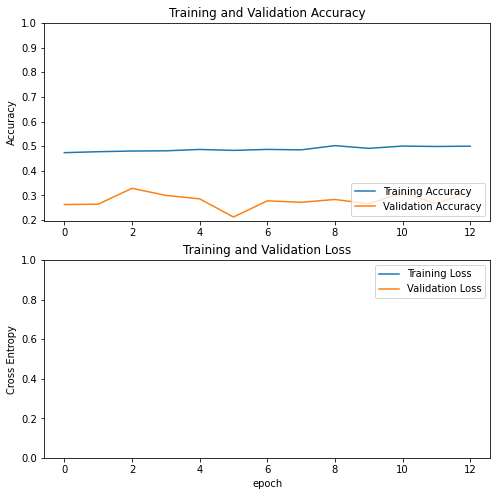

In [18]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model_json = model.to_json()
with open("fashion_model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
model.save_weights("fashion_model.h5")

In [ ]:
files.download("fashion_model.json")
files.download("fashion_model.h5")